<a href="https://colab.research.google.com/github/quantumhome/DataAnalysisCaseStudy/blob/master/Capstone_Project_Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Walmart DataSet.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df.shape

(6435, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Store'].value_counts()

,count
Store,
1,143
2,143
3,143
4,143
5,143
6,143
7,143
8,143
9,143


<ipython-input-9-21c799f78640>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  store_unemployment_corr = df.groupby('Store').apply(lambda x : x['Weekly_Sales'].corr(x['Unemployment']))


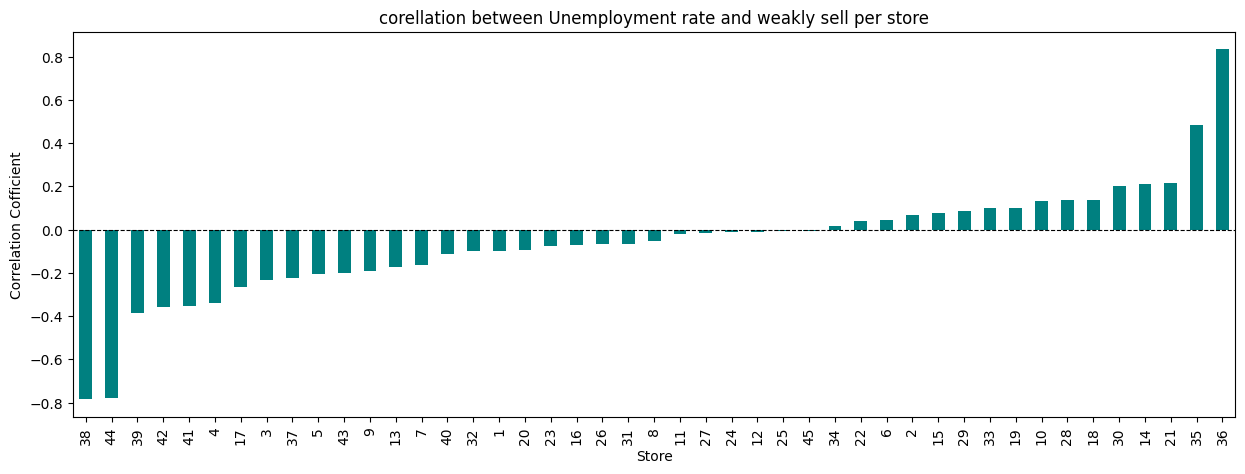

,0
Store,
38,-0.785290
44,-0.780076
39,-0.384681
42,-0.356355
41,-0.350630
4,-0.337015


In [ ]:
#  a. If the weekly sales are affected by the unemployment rate, if yes - which stores
#  are suffering the most?

#Here store are effected by the corelation of unemployment rate vs weekly sales

store_unemployment_corr = df.groupby('Store').apply(lambda x : x['Weekly_Sales'].corr(x['Unemployment']))

#short store by corellation length
store_unemployment_corr = store_unemployment_corr.sort_values()


#plot corellation for each store
plt.figure(figsize=(15,5))
store_unemployment_corr.plot(kind='bar', color='teal')
plt.title('corellation between Unemployment rate and weakly sell per store')
plt.xlabel('Store')
plt.ylabel('Correlation Cofficient')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.show()


store_unemployment_corr.head(6)


In [ ]:
# Store no --> (38, 44, 39, 42, 41, 4) are suffering the most

In [ ]:
# b.If the weekly sales show a seasonal trend, when and what could be the reason?


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.sort_values('Date')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
177,2,2010-01-10,1827440.43,0,69.24,2.603,211.329874,8.163
1178,9,2010-01-10,495692.19,0,69.08,2.603,215.214134,6.560
3037,22,2010-01-10,905987.17,0,69.31,2.717,136.629757,8.572
1893,14,2010-01-10,1855703.66,0,70.58,2.707,182.716838,8.724
4181,30,2010-01-10,445475.30,0,70.28,2.603,211.329874,8.163
...,...,...,...,...,...,...,...,...
6428,45,NaT,702238.27,0,67.87,3.948,191.699850,8.684
6429,45,NaT,723086.20,0,65.32,4.038,191.856704,8.684
6430,45,NaT,713173.95,0,64.88,3.997,192.013558,8.684
6433,45,NaT,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
daily_sales = df.groupby('Date')['Weekly_Sales'].sum()
daily_sales

,Weekly_Sales
Date,
2010-01-10,42239875.87
2010-02-04,50423831.26
2010-02-07,48917484.50
2010-03-09,47194257.61
2010-03-12,49909027.88
2010-04-06,50188543.12
2010-05-02,49750740.50
2010-05-03,46871470.30
2010-05-11,45781981.89


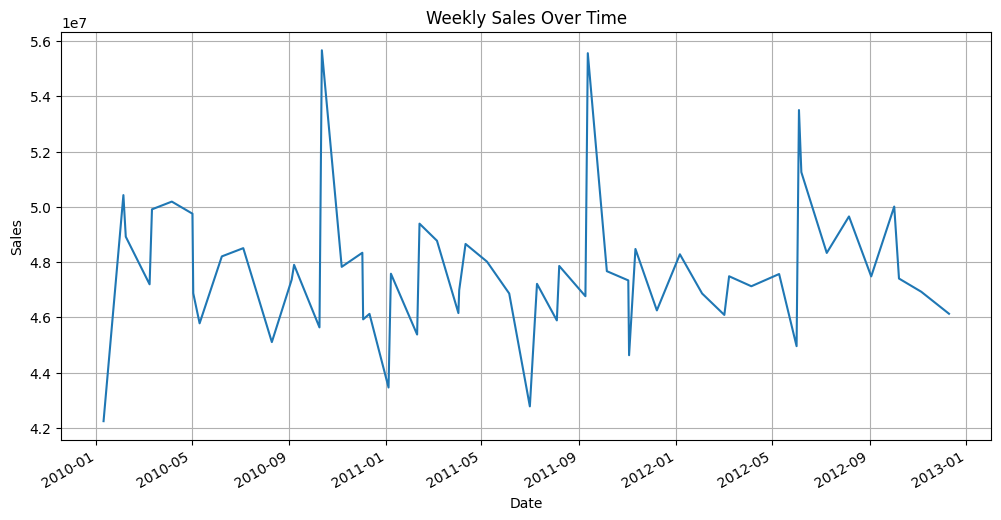

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
daily_sales.plot()
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


In [ ]:
#Seasonality Traind is happining in the month of October ans November
#In this time much more holidays is preasent that is the reason of increasing of sells

In [ ]:
#  c. Does temperature affect the weekly sales in any manner?

temp_corr = df['Temperature'].corr(df['Weekly_Sales'])
temp_corr

np.float64(-0.06381001317946955)

In [ ]:
#corr value is negative but near to zero, that mean if the Temperature is increase the Weekly_Sales also decrease.
#However, the effect is so small, it's not practically significant.

In [ ]:
# d. How is the Consumer Price index affecting the weekly sales of various stores?
cpi_corr = df['CPI'].corr(df['Weekly_Sales'])
print(cpi_corr)

-0.07263416204017631


In [ ]:
#corr value is negative but near to zero, that mean if the Consumer Price index is increase the Weekly_Sales also decrease.
#However, the effect is so small, it's not practically significant.

In [ ]:
#  e. Top performing stores according to the historical data.
top_stores = df.groupby('Store')['Weekly_Sales'].mean()
top_stores.sort_values(ascending=False).head(5)

,Weekly_Sales
Store,
20,2.107677e+06
4,2.094713e+06
14,2.020978e+06
13,2.003620e+06
2,1.925751e+06


In [ ]:
#Top performing stores according to the historical data are (20, 4, 14, 13, 2 )

In [ ]:
#  f.The worst performing store, and how significant is the difference between the
#  highest and lowest performing stores.
old_perform = df.groupby('Store')['Weekly_Sales'].mean()
old_perform.sort_values().head(1)

,Weekly_Sales
Store,
33,259861.692028


In [ ]:
#old perform store is 33

In [ ]:
old_perform = df.groupby('Store')['Weekly_Sales'].mean()
max=old_perform.sort_values().max()
min=old_perform.sort_values().min()
print(f'Performence gap between best vs worst store:{max-min}')


Performence gap between best vs worst store:1847815.1783216782


In [ ]:
##Performence gap between best vs worst store: 1847815.1783216782

In [ ]:
#2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet
from tqdm import tqdm

# Step 1: Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')
df = df.dropna(subset=['Date'])

#step 2: Prepare data for forecasting: one model per store
forecast_results = {}

#step 3: Group by store and apply Prophet(which is use in loop)
stores = df['Store'].unique()

for store in tqdm(stores, desc="Training models per store"):
    store_df = df[df['Store'] == store][['Date', 'Weekly_Sales']].rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})

    # Skip if not enough data
    if len(store_df) < 20:
        continue


    # Prophet model
    model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
    model.fit(store_df)



    # Future dataframe for 12 weeks
    future = model.make_future_dataframe(periods=12, freq='W')
    forecast = model.predict(future)

    # Store last 12 weeks of forecast
    forecast_results[store] = forecast[['ds', 'yhat']].tail(12).reset_index(drop=True)

print(forecast_results)

Training models per store:   0%|          | 0/45 [00:00<?, ?it/s]DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ilb5lqu/du9wrg9_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ilb5lqu/138ddj_n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8023', 'data', 'file=/tmp/tmp5ilb5lqu/du9wrg9_.json', 'init=/tmp/tmp5ilb5lqu/138ddj_n.json', 'output', 'file=/tmp/tmp5ilb5lqu/prophet_model9e39bfef/prophet_model-20250516191505.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:15:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:15:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
Training models per store:   2%|▏         | 1/45 [00:01<00:58,  1.33s/it]DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ilb5lqu/g4u7_uzi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5

{np.int64(2):            ds          yhat
0  2012-12-16  1.747383e+06
1  2012-12-23  1.685333e+06
2  2012-12-30  1.749748e+06
3  2013-01-06  1.854743e+06
4  2013-01-13  1.912928e+06
5  2013-01-20  1.920838e+06
6  2013-01-27  1.928037e+06
7  2013-02-03  1.952360e+06
8  2013-02-10  1.959727e+06
9  2013-02-17  1.926624e+06
10 2013-02-24  1.889123e+06
11 2013-03-03  1.904356e+06, np.int64(9):            ds           yhat
0  2012-12-16  564157.668672
1  2012-12-23  588249.862656
2  2012-12-30  598830.513399
3  2013-01-06  585768.155399
4  2013-01-13  569057.618903
5  2013-01-20  573965.485113
6  2013-01-27  600583.779347
7  2013-02-03  623962.305617
8  2013-02-10  623395.981701
9  2013-02-17  604996.641259
10 2013-02-24  591713.897648
11 2013-03-03  595372.778176, np.int64(22):            ds          yhat
0  2012-12-16  1.044939e+06
1  2012-12-23  1.125864e+06
2  2012-12-30  1.108620e+06
3  2013-01-06  9.698701e+05
4  2013-01-13  8.176047e+05
5  2013-01-20  7.849760e+05
6  2013-01-27  8.860